# Question:
### What are the main characteristics that have the most impact on the car price? 

#### import data 

In [66]:
# libraries
import pandas as pd
import numpy as np

In [67]:
url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(url, header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Analysing individual feature patterns usin visualizations

In [68]:
#import visulaization libraires
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Choosing the right visualtion method:

Before diving into make a visualization, it is first important to uderstand what type of variables we are dealing with and doing this it will help us find the right visualization method for that particulr variable. 

In [69]:
# check the data types of each columns
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

For now, we are interested to see the column 'peak-rpm'. 

the data type of this column is float64 which is numerical 

* For this type of datatype(float64 or int), we can use the method **corr()** method to calcualate correlation. 

In [70]:
df.corr()

ValueError: could not convert string to float: 'alfa-romero'

If we try to find the correlation of all at once, we get an error, as there are some other non numeric type of data variables. So, can't perform this action. 

#### Correlation between columns: bore, stroke, compression-ratio and horsepower

In [22]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [32]:
# mask the columns into datafram
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


#### Continous Numerical VAriables

* contain any value with some range. 
* can be of type "int64" or "float64". 
* To visualize these variables is by using __Scatterplot()__ with fitted lines. 


#### regplot()
* In order to stat understanding the linear relationship between an individual variable and the price, we can use 'regplot' which plots the scatterplot plus the fitted regression line. 

* this method is also for visualizing the fit of the simple linear regression model. 

(0.0, 53407.16607761585)

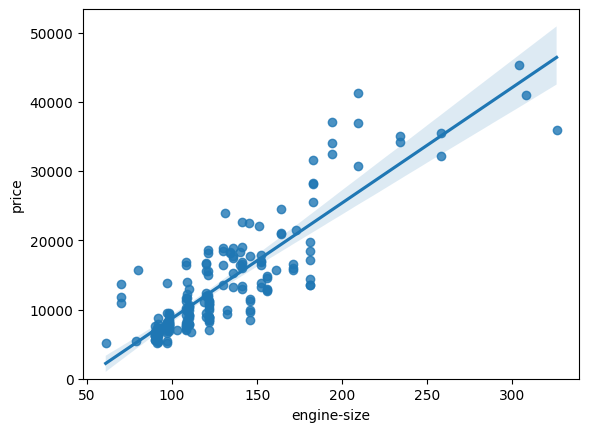

In [33]:
# Scatter plot of 'engine-size' and 'price'ArithmeticError

sns.regplot(x = 'engine-size', y = 'price', data =df)
plt.ylim(0, )

Interpretation:

As the engine size goes up, the price goes up. It shows that there is a positive correlation between these two variables. 

* Regression line is almost a perfect diagonal line so 'engine-size' seems a pretty good indicator of price. 

In [34]:
# correlation between 'engine-size' and 'price'ArithmeticError
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


The correlation between these variables is 0.87 which is close to 1, indicates a strong positive correlation. 

<Axes: xlabel='highway-mpg', ylabel='price'>

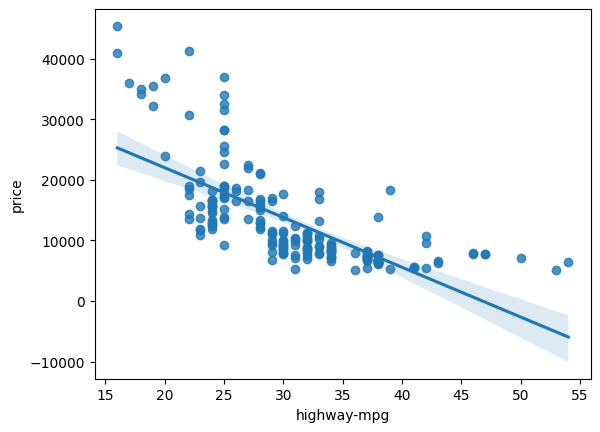

In [35]:
# scatterplot of 'highway-mpt' and 'price'

sns.regplot(x = 'highway-mpg',y= 'price', data = df)

Interepration:

* As highway-mpg goes up, the price seems moving down, indicating negative relationship between these two variables. 
* highway-mpg could be a predictor of price.

In [37]:
# check the correlation 
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


The correlation value is in negative (-0.704), which indicates negative relationship.

<Axes: xlabel='peak-rpm', ylabel='price'>

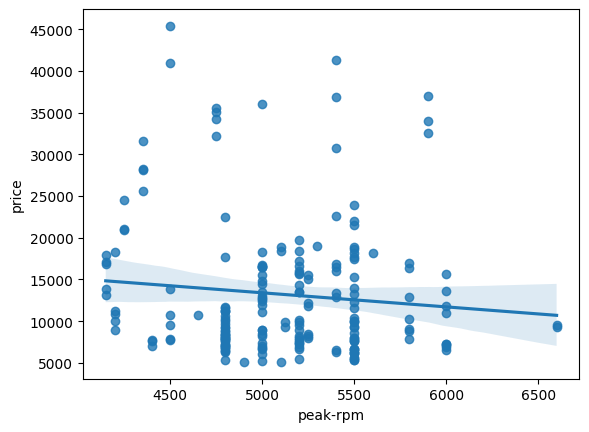

In [38]:
# check if 'peak-rpm' is a predictor variable of 'price'ArithmeticError
sns.regplot(x = 'peak-rpm', y = 'price', data = df)

* Regression line close to __horizontal__ line. 
* data points are very __scattered__ and far from the the fitted line, with lots of __variabllity__
* Results: It indicates weak relaionship which means not a reliable variable to be a predictor of the price. 

In [39]:
# check the value. 
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


The correlation between 'peak-rpm' and 'price' is -0.101616.

In [40]:
# correlation between the stroke and price

df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


The correlation is 0.0823, which is weak correlation and is not a predictor of the price. 

<Axes: xlabel='stroke', ylabel='price'>

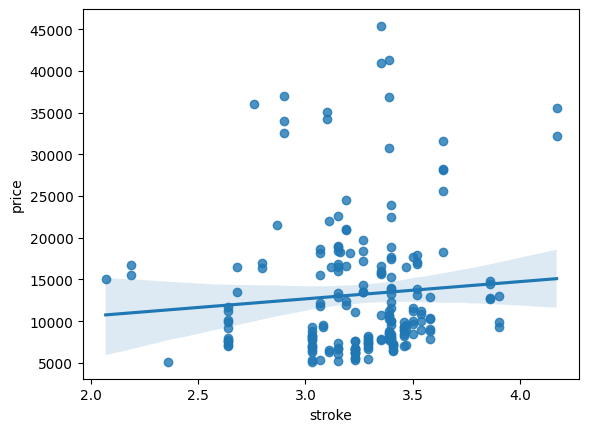

In [41]:
sns.regplot(x = 'stroke', y = 'price', data = df)

* Regression line close to zero
* data points are scattered around with lots of variablity

Therefore, not a strong predictor of a price. 

#### Categorical variables:

* Such variabes describe a 'characteristics' of a data unit and are selected from a small group of categories. 
* data type for categorical variables can be 'object' or 'int64'(lebeling). 
* to visulize categorical variables use __boxplots__

<Axes: xlabel='body-style', ylabel='price'>

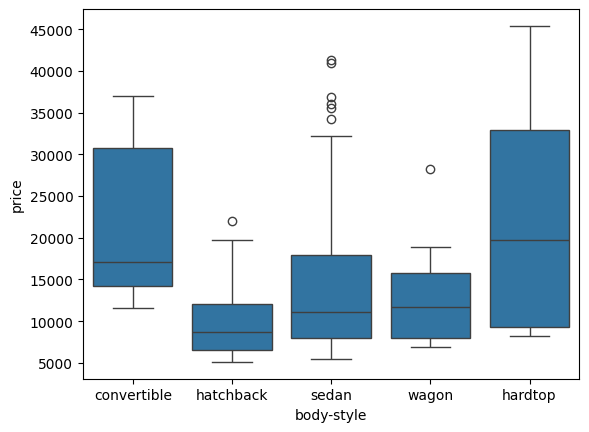

In [42]:
#check the relaionship between 'body-stype' and 'price'

sns.boxplot(x = 'body-style', y = 'price', data = df)


Seeing significant overlap type of distribution of price between different body-style categories, this would not be a good predictor of price. 

**Key Insights for EDA**:

1. **Price Variation Across Body Styles**:
   - Convertibles and hardtops tend to be the most expensive car types, with median prices around **$25,000**.
   - Hatchbacks and wagons are generally the least expensive, with median prices around **$10,000**.
   - Sedans fall in between, with a **moderate price range** but also show significant variation.

2. **Presence of Outliers**:
   - Hatchbacks and sedans show outliers, which means there are cars in these categories that are much more expensive than the majority of cars in their class.
   - These outliers could represent luxury models or high-performance variants.

3. **Price Distribution**:
   - Convertibles, sedans, and hardtops have the widest price ranges, which suggests a wide variety of models and features available in these body styles.
   - In contrast, hatchbacks and wagons show narrower price ranges, indicating more price consistency.


<Axes: xlabel='engine-location', ylabel='price'>

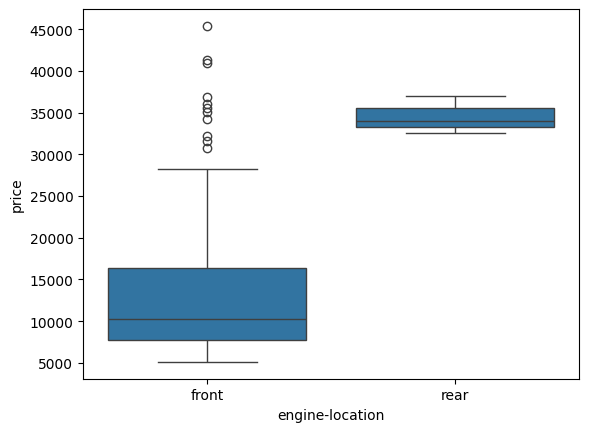

In [46]:
# check the engine-location and price
sns.boxplot(x = 'engine-location', y ='price', data = df)

The disrtibution of price between these two engine-locatino categories, front and rear, are distinct enough to take engine-location as a potentioal good indicator of price.

Rear-engine cars are consistently higher priced, and the narrow price range suggests that engine location can be a strong predictor for identifying expensive cars.

Front-engine cars, on the other hand, show a wider price range with a larger number of outliers, meaning that while engine location can help, additional features would likely be necessary to predict the price more accurately for this group.

<Axes: xlabel='drive-wheels', ylabel='price'>

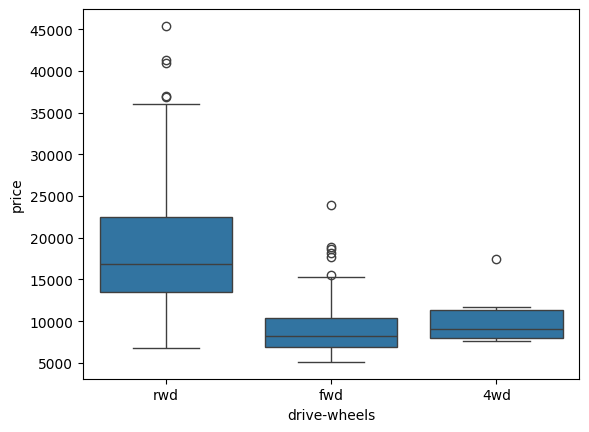

In [47]:
#check relation between drive wheels and price
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

wheels could be a prdictor of price

#### Descriptive Statistical Analysis

##### For numerical types: 

* This is a description or summary of the dataset
* basic statistics for all continous variables
* By defualt, it doesn't not calcualte categorical values, exlude the categorical variables, have option to include categoricals variables as well. 
* __NaN__ values are automatically skipped. 

Summary: 

* count of the variable
* mean
* standard deviation
* the minimum value
* IQR(interquartile range: 25%, 50%, and 75%)
* the maximum value

In [49]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [54]:
# if we want to include the type 'object'
df.describe(include = ['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


#### For categorical types

#### __value counts__

* Value counts help to find the number of units of each charaterisitcs/variable in the columns. 
* Note: value_counts() ony works on pandas series, not dataframe. Therefore, __ony include one bracket df['x']__



In [55]:
# check the 'drive-wheels' unit
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

The above is a pandas series, and can easily convert to dataframe as below

In [71]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Save the results to the dataframe 'drive-wheels_counts 
and rename the column 'drive-wheels' to 'value_counts'

In [72]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [73]:
# set the index
drive_wheels_counts.reset_index(inplace=True)
drive_wheels_counts

,drive-wheels,count
0,fwd,118
1,rwd,75
2,4wd,8


In [76]:
# rename
drive_wheels_counts.rename(columns={'drive-wheels':'values_count'}, inplace=True)
drive_wheels_counts

,values_count,count
0,fwd,118
1,rwd,75
2,4wd,8


In [77]:
# rename the index to 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,values_count,count
drive-wheels,,
0,fwd,118
1,rwd,75
2,4wd,8


Check for the engine-location

In [87]:
df['engine-location'].value_counts()

engine-location
front    198
rear       3
Name: count, dtype: int64

In [88]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts

,count
engine-location,
front,198
rear,3


In [90]:
engine_loc_counts.rename(columns={'engine-location':'value_counts'}, inplace = True)
engine_loc_counts


,count
engine-location,
front,198
rear,3


In [91]:
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,count
engine-location,
front,198
rear,3


There is only three cars with a rear engine and 198 with an front engine, which is skewed. 

therefore, engine-location is not a good predictor variable for the price. 